<a href="https://colab.research.google.com/github/EdWangLoDaSc/Bayesian-Neural-Networks/blob/master/2048_512%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is necessary to use tensorflow 1.14.0 under the environment of Colab.

In [40]:
pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
from google.colab import drive
drive.mount('./content')

Drive already mounted at ./content; to attempt to forcibly remount, call drive.mount("./content", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
## TensorFlow
import tensorflow as tf
#tf.compat.v1.reset_default_graph()

In [43]:
df = pd.read_csv('/content/content/MyDrive/2048_final.csv')


In [44]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
df = pd.read_csv('/content/content/MyDrive/CGAN_Regression/CGAN_code/Datasets/Datasets.csv')
df = df.drop(['Calculated-pChEMBL'], axis = 1).values

In [ ]:
2048-384-384-384

896

In [45]:
num_inputs = 2048

## Encoder section
hidden_1 = 1664     ## 256 (Number of nodes)
hidden_2 = 1280  ## 128
hidden_3 = 896  ## 64

## Latent Space
hidden_4 = 512  ## 32

## Decoder 
hidden_5 = hidden_3      ## 64
hidden_6 = hidden_2      ## 128
hidden_7 = hidden_1      ## 256

num_outputs = num_inputs ## 512

In [53]:
## Hyper Parameters: 

learning_rate = 0.001

## Activation function

"""
Here we are using Rectified Linear Unit( ReLu). It is at the left for the user to test and experiment 
with other activation functions and learning rate
"""

activ_fn = tf.nn.relu

## Input Layer

"""
Defining Input data
"""

X = tf.compat.v1.placeholder(tf.float32,shape = [None,num_inputs])

## scaling keras.initializers.
#initializer = tf.keras.initializers.variance_scaling_initializer()
initializer = tf.contrib.layers.variance_scaling_initializer()

In [54]:
## Weights(Parameters)
"""
Here we are randomly initializing the weights which are later updated based on the gradient descent and learning rate 
such that it minimizes the cost function
"""

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.Variable(initializer([hidden_3,hidden_4]),dtype=tf.float32)
w5 = tf.transpose(w4)
w6 = tf.transpose(w3)
w7 = tf.transpose(w2)
w8 = tf.transpose(w1)

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))
b4 = tf.Variable(tf.zeros(hidden_4))
b5 = b3
b6 = b2
b7 = b1
b8 = tf.Variable(tf.zeros(num_outputs))

hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
hid_layer6 = activ_fn(tf.matmul(hid_layer5,w6)+b6)
hid_layer7 = activ_fn(tf.matmul(hid_layer6,w7)+b7)
output_layer = activ_fn(tf.matmul(hid_layer7,w8)+b8)

In [55]:
## Loss Function(Cost function)

"""
Here we are defining the cost function, Minimizing loss between input and output layers
"""

loss = tf.reduce_mean(tf.square(output_layer - X))

optimizer = tf.train.AdamOptimizer(learning_rate)

## Optimizer
train = optimizer.minimize(loss)


## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [58]:
## Training the model

"""
Epoch: Number of training steps/iterations
Batch Size: Number of obseravtions that are used during each iterations to update weights. 
"""
num_epochs =300
batch_size = 512

to_plot_220 = []
from sklearn.utils import shuffle
#df = shuffle(df) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot_220.append(training_loss)
        print("Epoch: {} Loss: {}".format(epoch,training_loss))
        
        
    """
    Saving the trained model
    """
    saver.save(sess,'./checkpoint_dir/my_model')

Epoch: 0 Loss: 0.022736426442861557
Epoch: 1 Loss: 0.019388779997825623
Epoch: 2 Loss: 0.017028894275426865
Epoch: 3 Loss: 0.015426705591380596
Epoch: 4 Loss: 0.01376787293702364
Epoch: 5 Loss: 0.01270829327404499
Epoch: 6 Loss: 0.012020207941532135
Epoch: 7 Loss: 0.011254554614424706
Epoch: 8 Loss: 0.010785233229398727
Epoch: 9 Loss: 0.010169090703129768
Epoch: 10 Loss: 0.009823409840464592
Epoch: 11 Loss: 0.0100990179926157
Epoch: 12 Loss: 0.009252192452549934
Epoch: 13 Loss: 0.008894517086446285
Epoch: 14 Loss: 0.008583311922848225
Epoch: 15 Loss: 0.008186258375644684
Epoch: 16 Loss: 0.008137797005474567
Epoch: 17 Loss: 0.007990775629878044
Epoch: 18 Loss: 0.007723122835159302
Epoch: 19 Loss: 0.007230236195027828
Epoch: 20 Loss: 0.007192002143710852
Epoch: 21 Loss: 0.007143146358430386
Epoch: 22 Loss: 0.007102204021066427
Epoch: 23 Loss: 0.006852416787296534
Epoch: 24 Loss: 0.006775354500859976
Epoch: 25 Loss: 0.006598810199648142
Epoch: 26 Loss: 0.00654192641377449
Epoch: 27 Loss: 

In [66]:
lsd1 = pd.read_csv('/content/content/MyDrive/2048_dataset.csv').values

In [67]:
## With the weights obtained from training earlier, lets obtains the feature vectors at the latent space
with tf.Session() as sess:
    saver.restore(sess,'./checkpoint_dir/my_model')
    res = hid_layer4.eval(feed_dict={X: lsd1})

In [68]:
res

array([[0.        , 0.        , 0.        , ..., 0.5813594 , 0.22038461,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.38060668, 0.18699382,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.6538844 , 0.08100873,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.27658787, 0.32678458,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.35579535, 0.33068544,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.53077865,
        0.        ]], dtype=float32)

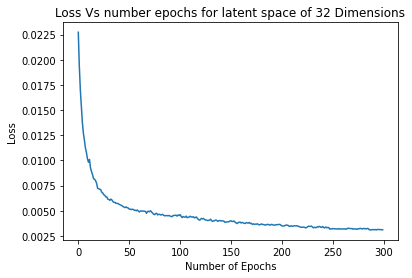

In [64]:
## Visualizing
import matplotlib.pyplot as plt
plt.plot(to_plot_220)
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for latent space of 32 Dimensions")
plt.show()

In [69]:
res.shape
dr = pd.DataFrame(res)
print(dr)
dr.to_csv('2048_521.csv')

     0    1    2    3    4    5         6         7    8         9    ...  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.193804  0.000000  0.0  0.648849  ...   
1    0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.404883  0.0  0.369937  ...   
2    0.0  0.0  0.0  0.0  0.0  0.0  0.298939  0.612330  0.0  0.697678  ...   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.695686  0.386214  0.0  0.041313  ...   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.238818  0.694935  0.0  0.339270  ...   
..   ...  ...  ...  ...  ...  ...       ...       ...  ...       ...  ...   
926  0.0  0.0  0.0  0.0  0.0  0.0  0.930748  0.476785  0.0  0.371940  ...   
927  0.0  0.0  0.0  0.0  0.0  0.0  0.315975  0.532350  0.0  0.072464  ...   
928  0.0  0.0  0.0  0.0  0.0  0.0  0.239083  0.630502  0.0  0.124235  ...   
929  0.0  0.0  0.0  0.0  0.0  0.0  0.032177  0.000000  0.0  0.156478  ...   
930  0.0  0.0  0.0  0.0  0.0  0.0  0.328920  0.175904  0.0  0.247453  ...   

          502       503  504  505  506       507  508       509       510  

# More larger Dimensions


In [ ]:
num_inputs = 512

hidden_1 = 512//2       ## 256
hidden_2 = hidden_1 //2  ## 128
hidden_3 = hidden_2 //2  ## 64
hidden_4 = hidden_2
hidden_5 = hidden_1

num_outputs = num_inputs ## 512

learning_rate = 0.001
activ_fn = tf.nn.relu
#norm = tf.nn.batch_normalization()

X = tf.placeholder(tf.float32,shape = [None,num_inputs])

## scaling 
initializer = tf.contrib.layers.variance_scaling_initializer()

## Weights

w1 = tf.Variable(initializer([num_inputs,hidden_1]),dtype=tf.float32)
w2 = tf.Variable(initializer([hidden_1,hidden_2]),dtype=tf.float32)
w3 = tf.Variable(initializer([hidden_2,hidden_3]),dtype=tf.float32)
w4 = tf.transpose(w3)
w5 = tf.transpose(w2)
w6 = tf.transpose(w1)



## Biases

b1 = tf.Variable(tf.zeros(hidden_1))
b2 = tf.Variable(tf.zeros(hidden_2))
b3 = tf.Variable(tf.zeros(hidden_3))

b4 = b2
b5 = b1

b6 = tf.Variable(tf.zeros(num_outputs))


hid_layer1 = activ_fn(tf.matmul(X,w1)+b1)
hid_layer2 = activ_fn(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = activ_fn(tf.matmul(hid_layer2,w3)+b3)
hid_layer4 = activ_fn(tf.matmul(hid_layer3,w4)+b4)
hid_layer5 = activ_fn(tf.matmul(hid_layer4,w5)+b5)
output_layer = activ_fn(tf.matmul(hid_layer5,w6)+b6)

## Loss Function

loss = tf.reduce_mean(tf.square(output_layer - X))

## Optimzer
optimizer = tf.train.AdamOptimizer(learning_rate)

train = optimizer.minimize(loss)

## Initialzing
init = tf.global_variables_initializer()

saver = tf.train.Saver()

num_epochs = 500
batch_size = 8
to_plot = []
from sklearn.utils import shuffle
#X = shuffle(X) 

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for index, offset in enumerate(range(0, df.shape[0], batch_size)):
            xs = df[offset: offset + batch_size]
            #print(offset)
            sess.run(train, feed_dict={X: xs})
        training_loss = loss.eval(feed_dict={X: xs})
        to_plot.append(training_loss)
        if epoch % 20 == 0:
          print("Epoch: {} Loss: {}".format(epoch,training_loss))
    
    saver.save(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')


Epoch: 0 Loss: 0.10121292620897293
Epoch: 20 Loss: 0.012367009185254574
Epoch: 40 Loss: 0.01190527155995369
Epoch: 60 Loss: 0.009825997985899448
Epoch: 80 Loss: 0.012089080177247524
Epoch: 100 Loss: 0.012143723666667938
Epoch: 120 Loss: 0.008897398598492146
Epoch: 140 Loss: 0.00812164694070816
Epoch: 160 Loss: 0.010212169960141182
Epoch: 180 Loss: 0.008470087312161922
Epoch: 200 Loss: 0.010004487819969654
Epoch: 220 Loss: 0.008345128037035465
Epoch: 240 Loss: 0.008415118791162968
Epoch: 260 Loss: 0.008509389124810696
Epoch: 280 Loss: 0.00817402359098196
Epoch: 300 Loss: 0.0077760168351233006
Epoch: 320 Loss: 0.007885734550654888
Epoch: 340 Loss: 0.008110381662845612
Epoch: 360 Loss: 0.006951645016670227
Epoch: 380 Loss: 0.007551573216915131
Epoch: 400 Loss: 0.0071871024556458
Epoch: 420 Loss: 0.007503820117563009
Epoch: 440 Loss: 0.009221826680004597
Epoch: 460 Loss: 0.007303739432245493
Epoch: 480 Loss: 0.007328186649829149


In [ ]:
with tf.Session() as sess:
    saver.restore(sess,'./stacked_autoencoder_32_50D_tanh.ckpt')
    d50 = hid_layer3.eval(feed_dict={X: df})  

np.savetxt('Dim_64.tsv',d50,delimiter='\t')

In [ ]:
d50

array([[0.60872406, 0.        , 0.        , ..., 0.01195174, 0.        ,
        0.        ],
       [0.        , 1.5955508 , 0.        , ..., 0.        , 0.        ,
        1.7521322 ],
       [0.        , 2.2621021 , 0.        , ..., 0.        , 0.        ,
        2.5632324 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.000032  ],
       [0.        , 0.        , 0.        , ..., 1.340622  , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.56723374, 0.        ,
        0.0072813 ]], dtype=float32)

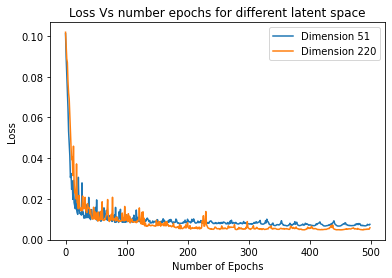

In [ ]:
Dim_51,= plt.plot(to_plot, label="Dimension 51")
Dim_220, =  plt.plot(to_plot_220, label="Dimension 220")
plt.legend(handles=[Dim_51, Dim_220])
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Loss Vs number epochs for different latent space")
plt.show()
